In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
adata = sc.read('/group/testa/Project/OvarianAtlas/Zheng2023/Adata/zheng2023_rawcounts.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 223363 × 27117
    obs: 'sample_name', 'tissue', 'developmental_stage', 'patient_id', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [4]:
adata.obs

,sample_name,tissue,developmental_stage,patient_id,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
EOC1_PBMC_cell_AAACCTGAGAAGGCCT,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,1660,1660,6736.0,199.0,2.954276
EOC1_PBMC_cell_AAACCTGAGATGCGAC,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,4372,4372,33886.0,1661.0,4.901729
EOC1_PBMC_cell_AAACCTGAGCTGTTCA,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,1635,1635,4998.0,179.0,3.581433
EOC1_PBMC_cell_AAACCTGAGGGTCTCC,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,1625,1625,6397.0,157.0,2.454275
EOC1_PBMC_cell_AAACCTGAGGTGCTAG,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,1269,1269,3766.0,227.0,6.027616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1_OC_cell_TGCTACCGTCCGAACC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng,4985,4985,20793.0,1401.0,6.737844
C1_OC_cell_TGGGCGTTCACTATTC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng,5798,5798,24396.0,961.0,3.939170
C1_OC_cell_TGTCCCAGTAACGACG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng,1583,1583,3354.0,133.0,3.965414
C1_OC_cell_TGTTCCGCAGGTCTCG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng,2141,2141,6056.0,540.0,8.916777


In [5]:
adata.obs.drop(columns=['n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'], inplace=True)

In [6]:
adata.obs

,sample_name,tissue,developmental_stage,patient_id,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset
EOC1_PBMC_cell_AAACCTGAGAAGGCCT,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
EOC1_PBMC_cell_AAACCTGAGATGCGAC,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
EOC1_PBMC_cell_AAACCTGAGCTGTTCA,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
EOC1_PBMC_cell_AAACCTGAGGGTCTCC,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
EOC1_PBMC_cell_AAACCTGAGGTGCTAG,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
...,...,...,...,...,...,...,...,...,...,...
C1_OC_cell_TGCTACCGTCCGAACC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng
C1_OC_cell_TGGGCGTTCACTATTC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng
C1_OC_cell_TGTCCCAGTAACGACG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng
C1_OC_cell_TGTTCCGCAGGTCTCG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng


In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [8]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

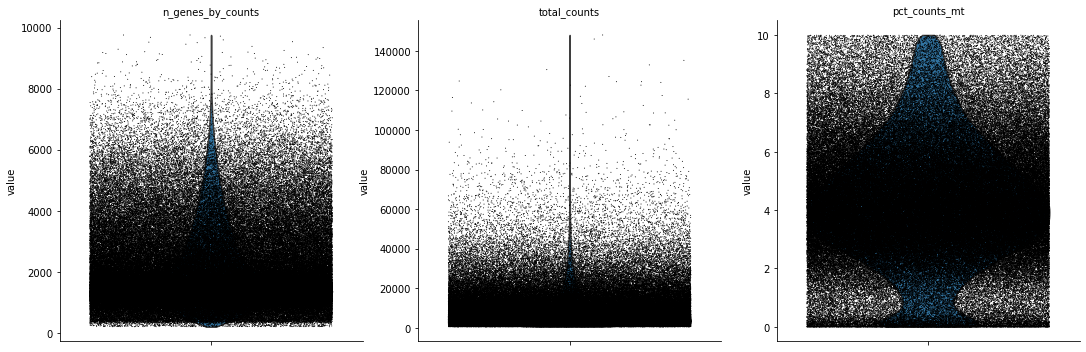

In [9]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

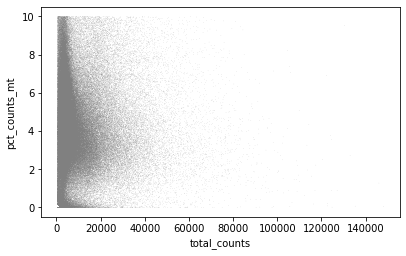

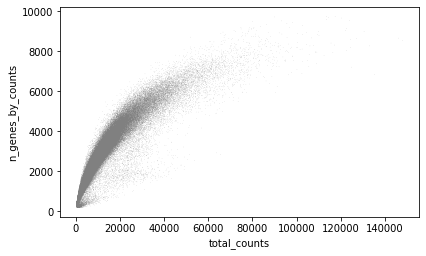

In [10]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [11]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_mt < 8, :]

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)

/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
adata.write("/group/testa/Project/OvarianAtlas/Zheng2023/Adata/zheng2023_wholedataset_filt_norm_nolog.h5ad")

In [15]:
sc.pp.log1p(adata)

In [16]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

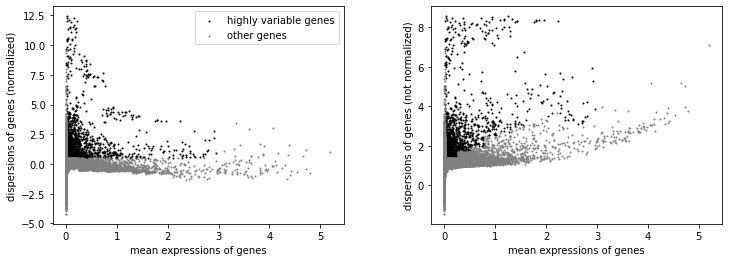

In [17]:
sc.pl.highly_variable_genes(adata)

In [18]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)

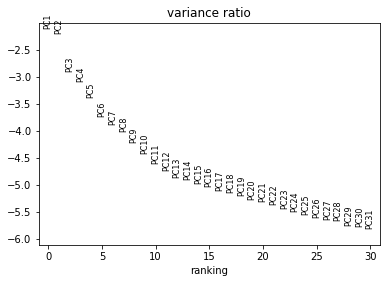

In [19]:
sc.pl.pca_variance_ratio(adata, log=True)

In [20]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [21]:
sc.tl.umap(adata)

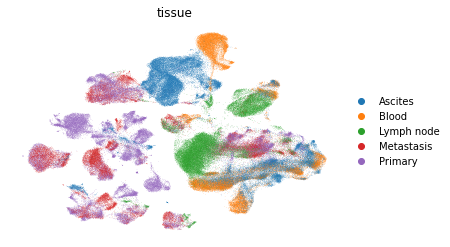

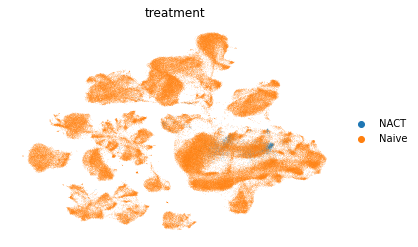

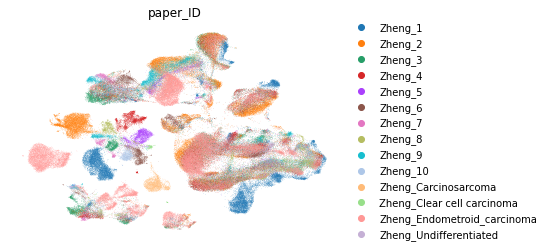

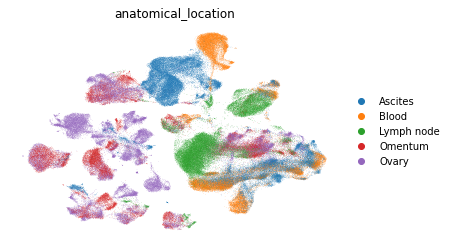

In [23]:
sc.pl.umap(adata, color=['tissue'], frameon = False)
sc.pl.umap(adata, color=['treatment'], frameon = False)
sc.pl.umap(adata, color=['paper_ID'], frameon = False)
sc.pl.umap(adata, color=['anatomical_location'], frameon = False)

In [24]:
adata.write("/group/testa/Project/OvarianAtlas/Zheng2023/Adata/zheng2023_wholedataset_embeddings.h5ad")

## Considering only HGSOC data and removing blood and lymph nodes

In [39]:
adata = sc.read('/group/testa/Project/OvarianAtlas/Zheng2023/Adata/zheng2023_rawcounts.h5ad')

In [40]:
adata

AnnData object with n_obs × n_vars = 223363 × 27117
    obs: 'sample_name', 'tissue', 'developmental_stage', 'patient_id', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [41]:
adata.obs

,sample_name,tissue,developmental_stage,patient_id,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
EOC1_PBMC_cell_AAACCTGAGAAGGCCT,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,1660,1660,6736.0,199.0,2.954276
EOC1_PBMC_cell_AAACCTGAGATGCGAC,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,4372,4372,33886.0,1661.0,4.901729
EOC1_PBMC_cell_AAACCTGAGCTGTTCA,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,1635,1635,4998.0,179.0,3.581433
EOC1_PBMC_cell_AAACCTGAGGGTCTCC,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,1625,1625,6397.0,157.0,2.454275
EOC1_PBMC_cell_AAACCTGAGGTGCTAG,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng,1269,1269,3766.0,227.0,6.027616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1_OC_cell_TGCTACCGTCCGAACC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng,4985,4985,20793.0,1401.0,6.737844
C1_OC_cell_TGGGCGTTCACTATTC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng,5798,5798,24396.0,961.0,3.939170
C1_OC_cell_TGTCCCAGTAACGACG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng,1583,1583,3354.0,133.0,3.965414
C1_OC_cell_TGTTCCGCAGGTCTCG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng,2141,2141,6056.0,540.0,8.916777


In [42]:
adata.obs.drop(columns=['n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'], inplace=True)

In [43]:
adata.obs

,sample_name,tissue,developmental_stage,patient_id,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset
EOC1_PBMC_cell_AAACCTGAGAAGGCCT,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
EOC1_PBMC_cell_AAACCTGAGATGCGAC,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
EOC1_PBMC_cell_AAACCTGAGCTGTTCA,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
EOC1_PBMC_cell_AAACCTGAGGGTCTCC,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
EOC1_PBMC_cell_AAACCTGAGGTGCTAG,HGSOC1_BC,Blood,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Blood,Zheng
...,...,...,...,...,...,...,...,...,...,...
C1_OC_cell_TGCTACCGTCCGAACC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng
C1_OC_cell_TGGGCGTTCACTATTC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng
C1_OC_cell_TGTCCCAGTAACGACG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng
C1_OC_cell_TGTTCCGCAGGTCTCG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng


In [44]:
adata.obs.tissue.unique()

['Blood', 'Primary', 'Metastasis', 'Ascites', 'Lymph node']
Categories (5, object): ['Ascites', 'Blood', 'Lymph node', 'Metastasis', 'Primary']

In [58]:
mask = ((adata.obs['tissue'] != 'Blood') & (adata.obs['tissue'] != 'Lymph node'))

In [60]:
mask.sum()

146888

In [49]:
(adata.obs['tissue'] == 'Blood').sum()

35501

In [51]:
(adata.obs['tissue'] == 'Lymph node').sum()

40974

In [53]:
((adata.obs['tissue'] == 'Blood') | (adata.obs['tissue'] == 'Lymph node')).sum()

76475

In [61]:
adata = adata[mask]

In [62]:
adata

View of AnnData object with n_obs × n_vars = 146888 × 27117
    obs: 'sample_name', 'tissue', 'developmental_stage', 'patient_id', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [63]:
adata.obs

,sample_name,tissue,developmental_stage,patient_id,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset
EOC1_OC_cell_AAACCTGAGATGCGAC,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
EOC1_OC_cell_AAACCTGCAGCTGCAC,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
EOC1_OC_cell_AAACCTGGTGATAAAC,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
EOC1_OC_cell_AAAGATGAGCTAAACA,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
EOC1_OC_cell_AAAGTAGAGCGTCTAT,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
...,...,...,...,...,...,...,...,...,...,...
C1_OC_cell_TGCTACCGTCCGAACC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng
C1_OC_cell_TGGGCGTTCACTATTC,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng
C1_OC_cell_TGTCCCAGTAACGACG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng
C1_OC_cell_TGTTCCGCAGGTCTCG,C1_PT,Primary,Advanced stage,Carcinosarcoma,Naive,Sensitive,IIIC,Zheng_Carcinosarcoma,Ovary,Zheng


In [64]:
adata.obs.paper_ID.unique()

['Zheng_1', 'Zheng_3', 'Zheng_2', 'Zheng_7', 'Zheng_Undifferentiated', ..., 'Zheng_8', 'Zheng_9', 'Zheng_Endometroid_carcinoma', 'Zheng_10', 'Zheng_Carcinosarcoma']
Length: 14
Categories (14, object): ['Zheng_1', 'Zheng_2', 'Zheng_3', 'Zheng_4', ..., 'Zheng_Carcinosarcoma', 'Zheng_Clear cell carcinoma', 'Zheng_Endometroid_carcinoma', 'Zheng_Undifferentiated']

In [65]:
mask2 = ((adata.obs['paper_ID'] != 'Zheng_Carcinosarcoma') & 
        (adata.obs['paper_ID'] != 'Zheng_Clear cell carcinoma') & 
        (adata.obs['paper_ID'] != 'Zheng_Endometroid_carcinoma') & 
        (adata.obs['paper_ID'] != 'Zheng_Undifferentiated'))

In [66]:
mask2.sum()

104913

In [67]:
adata = adata[mask2]

In [68]:
adata

View of AnnData object with n_obs × n_vars = 104913 × 27117
    obs: 'sample_name', 'tissue', 'developmental_stage', 'patient_id', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [69]:
adata.obs

,sample_name,tissue,developmental_stage,patient_id,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset
EOC1_OC_cell_AAACCTGAGATGCGAC,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
EOC1_OC_cell_AAACCTGCAGCTGCAC,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
EOC1_OC_cell_AAACCTGGTGATAAAC,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
EOC1_OC_cell_AAAGATGAGCTAAACA,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
EOC1_OC_cell_AAAGTAGAGCGTCTAT,HGSOC1_PT,Primary,Advanced stage,P1,Naive,Sensitive,IIIC,Zheng_1,Ovary,Zheng
...,...,...,...,...,...,...,...,...,...,...
EOC10_OC_cell_TCTTTCCGTCCAACTA,HGSOC10_PT,Primary,Advanced stage,P10,Naive,Sensitive,IIIC,Zheng_10,Ovary,Zheng
EOC10_OC_cell_TGATTTCAGGTGCAAC,HGSOC10_PT,Primary,Advanced stage,P10,Naive,Sensitive,IIIC,Zheng_10,Ovary,Zheng
EOC10_OC_cell_TGCGTGGCACTAAGTC,HGSOC10_PT,Primary,Advanced stage,P10,Naive,Sensitive,IIIC,Zheng_10,Ovary,Zheng
EOC10_OC_cell_TGCGTGGCATACCATG,HGSOC10_PT,Primary,Advanced stage,P10,Naive,Sensitive,IIIC,Zheng_10,Ovary,Zheng


In [70]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, copying.


In [71]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

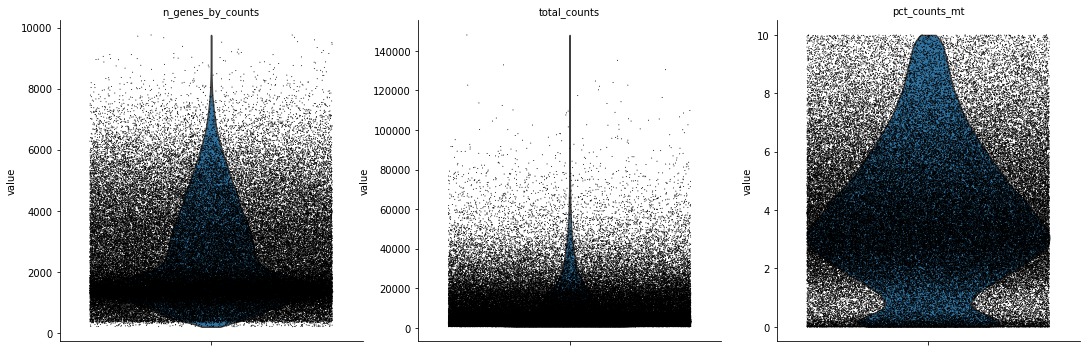

In [72]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

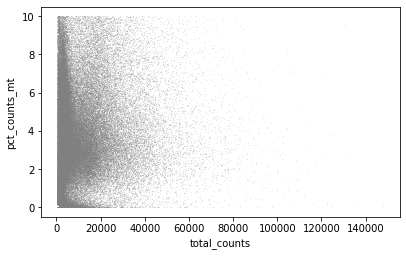

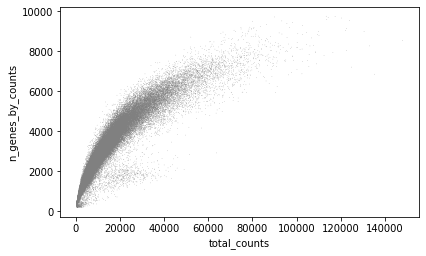

In [73]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [74]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_mt < 8, :]

In [75]:
sc.pp.normalize_total(adata, target_sum=1e4)

/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [76]:
adata.write("/group/testa/Project/OvarianAtlas/Zheng2023/Adata/zheng2023_filt_norm_nolog.h5ad")

In [77]:
sc.pp.log1p(adata)

In [78]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

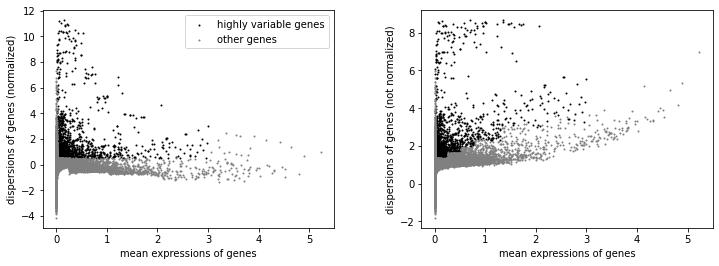

In [79]:
sc.pl.highly_variable_genes(adata)

In [80]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)

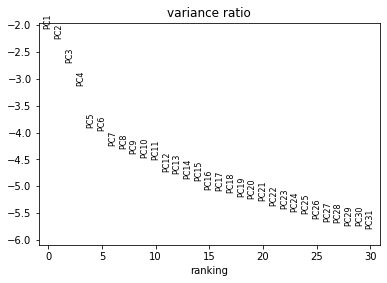

In [81]:
sc.pl.pca_variance_ratio(adata, log=True)

In [82]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [83]:
sc.tl.umap(adata)

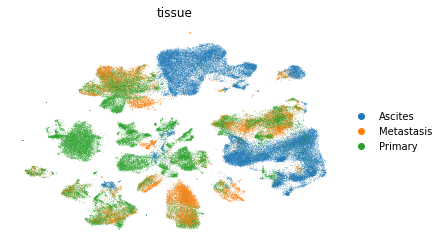

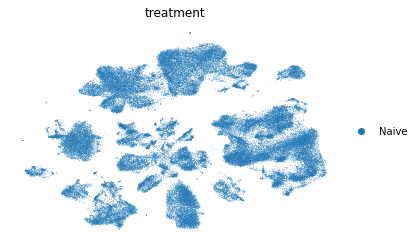

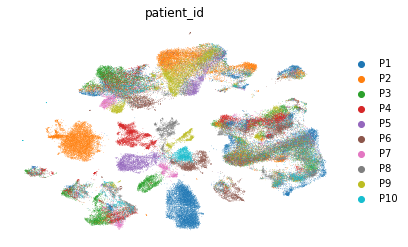

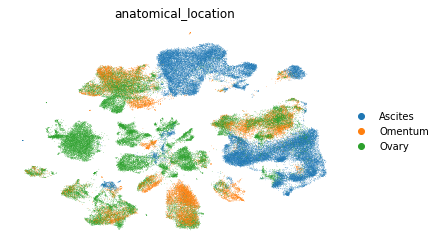

In [84]:
sc.pl.umap(adata, color=['tissue'], frameon = False)
sc.pl.umap(adata, color=['treatment'], frameon = False)
sc.pl.umap(adata, color=['patient_id'], frameon = False)
sc.pl.umap(adata, color=['anatomical_location'], frameon = False)

In [ ]:
adata.write("/group/testa/Project/OvarianAtlas/Zheng2023/Adata/zheng2023_embeddings.h5ad")